In [25]:
from keras import layers
from keras.models import Model
from keras.datasets import mnist

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
(x_train, _), (x_test, _) = mnist.load_data()

In [27]:
input_img = layers.Input( shape = ( 28, 28, 1 ) )

# Encoding

# Conv1
x = layers.Conv2D( filters = 16, kernel_size = ( 3, 3 ),
                  activation = 'relu', padding = 'same' )( input_img )
x = layers.MaxPooling2D( pool_size = ( 2, 2 ), padding = 'same' )( x )

# Conv2
x = layers.Conv2D( 9, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = layers.MaxPooling2D( padding = 'same' )( x )

# Conv3
x = layers.Conv2D( 8, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
encoded = layers.MaxPooling2D( padding = 'same' )( x )

# Decoding

# DeConv1
x = layers.Conv2D( 8, ( 3, 3 ), activation = 'relu', padding = 'same' )( encoded )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

# DeConv2
x = layers.Conv2D( 8, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

# Deconv3
x = layers.Conv2D( 16, ( 3, 3 ), activation = 'relu' )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )
decoded = layers.Conv2D( 1, ( 3, 3 ), activation = 'sigmoid', padding = 'same' )( x )

In [28]:
autoencoder = Model( input_img, decoded )
autoencoder.compile( optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = [ 'acc', 'val_acc' ]  )

In [29]:
autoencoder.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 9)         1305      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 9)           0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 8)           656       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 8)          

In [30]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal( loc = 0.0, scale = 1.0, size = x_train.shape )
x_test_noisy = x_test + noise_factor * np.random.normal( loc = 0.0, scale = 1.0, size = x_test.shape )

x_train_noisy = np.clip( x_train_noisy, 0., 1. )
x_test_noisy = np.clip( x_test_noisy, 0., 1. )

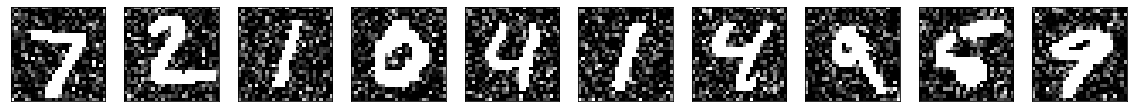

In [31]:
n = 10
plt.figure( figsize = ( 20, 2 ) )
for i in range( n ):
    ax = plt.subplot( 1, n, i + 1 )
    plt.imshow( x_test_noisy[i].reshape( 28, 28 ) )
    plt.gray()

    ax.get_xaxis().set_visible( False )
    ax.get_yaxis().set_visible( False )
plt.show()

In [32]:
x_train_noisy.shape, x_train.shape

((60000, 28, 28), (60000, 28, 28))

In [33]:
autoencoder.fit( x_train_noisy, x_train,
                epochs = 100, batch_size = 128, shuffle = True, validation_data = ( x_test_noisy, x_test ) )

Epoch 1/100
469/469 [==============================] - 70s 149ms/step - loss: -4.7302 - val_loss: -7.2907
Epoch 2/100
469/469 [==============================] - 70s 150ms/step - loss: -14.8329 - val_loss: -35.3522
Epoch 3/100
469/469 [==============================] - 72s 153ms/step - loss: -377.3004 - val_loss: -501.3631
Epoch 4/100
469/469 [==============================] - 72s 153ms/step - loss: -494.1353 - val_loss: -501.3979
Epoch 5/100
469/469 [==============================] - 74s 158ms/step - loss: -494.1708 - val_loss: -501.4369
Epoch 6/100
469/469 [==============================] - 70s 150ms/step - loss: -494.2136 - val_loss: -501.4856
Epoch 7/100
469/469 [==============================] - 70s 150ms/step - loss: -494.2672 - val_loss: -501.5491
Epoch 8/100
469/469 [==============================] - 70s 149ms/step - loss: -494.3408 - val_loss: -501.6407
Epoch 9/100
469/469 [==============================] - 70s 150ms/step - loss: -494.4507 - val_loss: -501.7682
Epoch 10/100
469

AttributeError: ignored

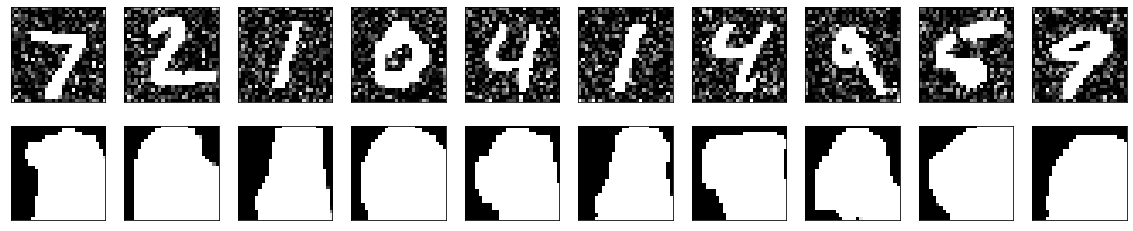

In [34]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()